<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Matrix Review***

$ \ $

$\color{lightblue}{\text{Matrix operations}}$ are a fundamental part of

* machine learning

* digital signal processing,

* optimization,

* control systems,

* computer graphics,

and so on. As a result, there has been a lot of work on optimizing matrix operations, not only in software, but in hardware. Let's say you work for a AI hardware company, the company has developed a new processor that can only perform matrix operations. The company needs you to implement some popular statistics such as

* mean,

* variance,

* Principle Component Analysis ($PCA$)

using Matrix operations.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/technology-electronic-device-computer-hardware-computer-component-electronics-motherboard-personal-computer-hardware-cpu-computer-accessory-1536663.jpeg" width="500" alt="https://pxhere.com/en/photo/1536663">


$ \ $

---

## ***Objectives***

After completing this lab you will be able to:

*   Understand Basic Matrix operations such as Matrix addition, Vector Multiplication and Eigen decomposition.

*   Apply these Matrix operations using numpy.


$ \ $

-----

## ***Setup***

$ \ $

For this lab, we will be using the following libraries:

*   [pandas](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for managing the data.


*   [numpy](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for mathematical operations.


*   [seaborn](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for visualizing the data.


*   [matplotlib](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for visualizing the data.


*   [sklearn](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) for machine learning and machine-learning-pipeline related functions.


$ \ $

-----

## ***Importing required libraries***

$ \ $

The following required modules are pre-installed in the Skills Network Labs environment.

In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
from sympy import Matrix, init_printing,Symbol
from numpy.linalg import qr,eig,inv,matrix_rank,inv, norm
from scipy.linalg import null_space
init_printing()

In [2]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

$ \ $

----

## ***Defining Helper Functions***

$ \ $

Use this section to define any helper functions to help the notebook's code readability.

In [3]:
def plot_2d(dic):

    # realizamos una iteracion sobre los items del diccionario dic
    for key, value in dic.items():

        # si el numero de renglones es mayor que 2, entonces aplicamos este condicional
        if value.shape[0] > 2:

            # si value es un dataframe, entonces tomamos la columna 0
            x = value[:, 0]

            # si value es un dataframe, entonces tomamos la columna 1
            y = value[:, 1]

            # realizamos un scatterplot (x,y)
            plt.scatter(x, y, label = key)

        # si el numero de renglones es menor o igual a 2, entonces realizamos este  condicional
        else:

            # imprimimos el valor de value
            print(value)

            # si value es un dataframe, entonces tomamos la columna 0
            x = value[:, 0]

            # si value es un dataframe, entonces tomamos la columna 1
            y = value[:, 1]

            # quiver es básicamente un tipo de diagrama 2D que muestra líneas vectoriales como flechas.
            # Este tipo de gráficos son útiles en ingenieros eléctricos para visualizar el potencial eléctrico y mostrar gradientes de tensión en ingeniería mecánica.
            plt.quiver([0], [0], x, y, label = key)

    # describimos la leyenda de la imagen
    plt.legend()

    # mostramos en pantalla la imagen creada
    plt.show()


$ \ $

----

## ***Basics of Matrices***

$ \ $

Numpy treats matrix objects as numpy arrays, so we will use Numpy to create matrices.

$ \ $

$(1)$ Let's consider the square matrix $A$.

In [4]:
A = np.array([[2,-3],
              [4,7]])

Matrix(A)

⎡2  -3⎤
⎢     ⎥
⎣4  7 ⎦

In [5]:
# tomamos la columna 0 de A
a_1 = A[ : , 0]

# mostramos el array creado anteriormente
Matrix(a_1)

⎡2⎤
⎢ ⎥
⎣4⎦

In [6]:
# tomamos la columna 1 de A
a_2 = A[ : , 1]

# mostramos el array creado anteriormente en forma de matriz
Matrix(a_2)

⎡-3⎤
⎢  ⎥
⎣7 ⎦

$ \ $

$(2)$ Denoted by $A^{T}$, the transpose of a matrix  switches the row and column indices of the matrix, in numpy we can determine the transpose of $A$ as follows.

In [7]:
# describimos la transpuesta de A
AT = A.T

# mostramos el array creado anteriormente en forma de matriz
Matrix(AT)

⎡2   4⎤
⎢     ⎥
⎣-3  7⎦

$ \ $

----

## ***Rank of a Matrix***

$ \ $

The <a href='https://en.wikipedia.org/wiki/Rank_(linear_algebra)'>rank</a> of a matrix $A$ is the dimension of the vector space generated (or spanned) by its columns.

$ \ $

$(1)$ Let's consider an example.

In [8]:
# describimos la matriz A
A = np.array([[2, -3],
              [4, 7]])

# hallamos el rango de A
matrix_rank(A)

2

$ \ $

$(2)$ We can plot the columns of $A$ as vectors.


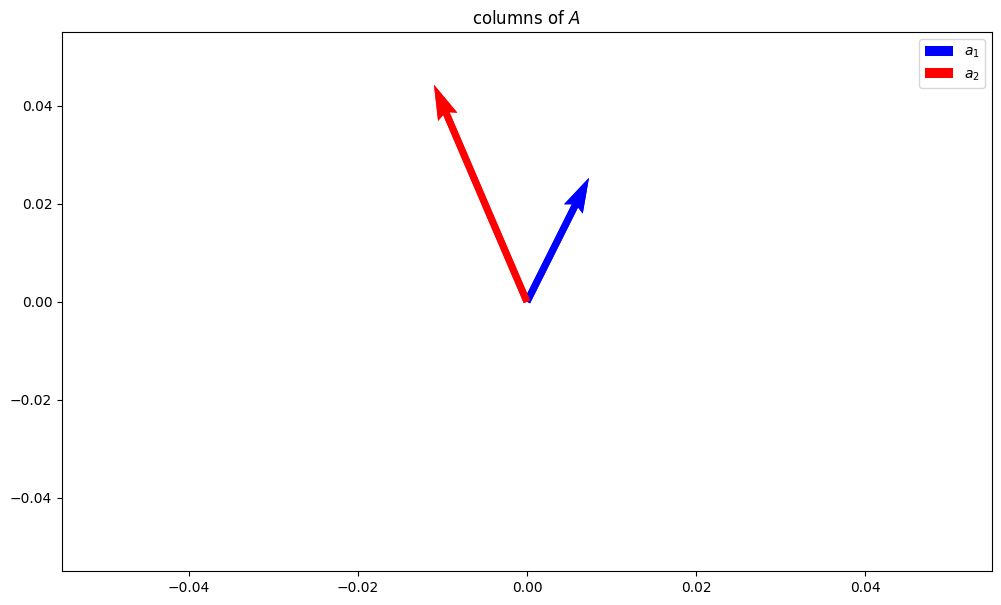

In [9]:
#creamos una imagen de tamaño 12 x 7
fig, ax = plt.subplots(figsize = (12, 7))

# quiver es básicamente un tipo de diagrama 2D que muestra líneas vectoriales como flechas.
# Este tipo de gráficos son útiles en ingenieros eléctricos para visualizar el potencial eléctrico y mostrar gradientes de tensión en ingeniería mecánica.
# A[0,0] = 2
# A[1,0] = 4
ax.quiver([0, 0], [0, 0], A[0,0], A[1,0], scale = 30, label = "$a_{1}$", color = "blue")

# quiver es básicamente un tipo de diagrama 2D que muestra líneas vectoriales como flechas.
# Este tipo de gráficos son útiles en ingenieros eléctricos para visualizar el potencial eléctrico y mostrar gradientes de tensión en ingeniería mecánica.
# A[0,1] = -3
# A[1,1] = 7
ax.quiver([0, 0], [0, 0], A[0,1], A[1,1], scale = 30, label = "$a_{2}$", color = "red")

# mostramos el titulo en pantalla
plt.title("columns of $A$ ")

# mostranos la leyenda de la imagen
plt.legend()

# mostramos nuestra imagen creada en pantalla
plt.show()

As the vectors are not parallel, we can define any point on the $2$d space as a scaled combination of those two vectors. Also, if any of the columns in a matrix are multiples of each other, then the matrix is not full rank.

$ \ $

$(3)$ We see that the columns of $F$ are pointing in the same direction.

In [10]:
# creamos el array F
F = np.array([[2,4],
              [4,8]])

# describimos el rango de F
matrix_rank(F)

1

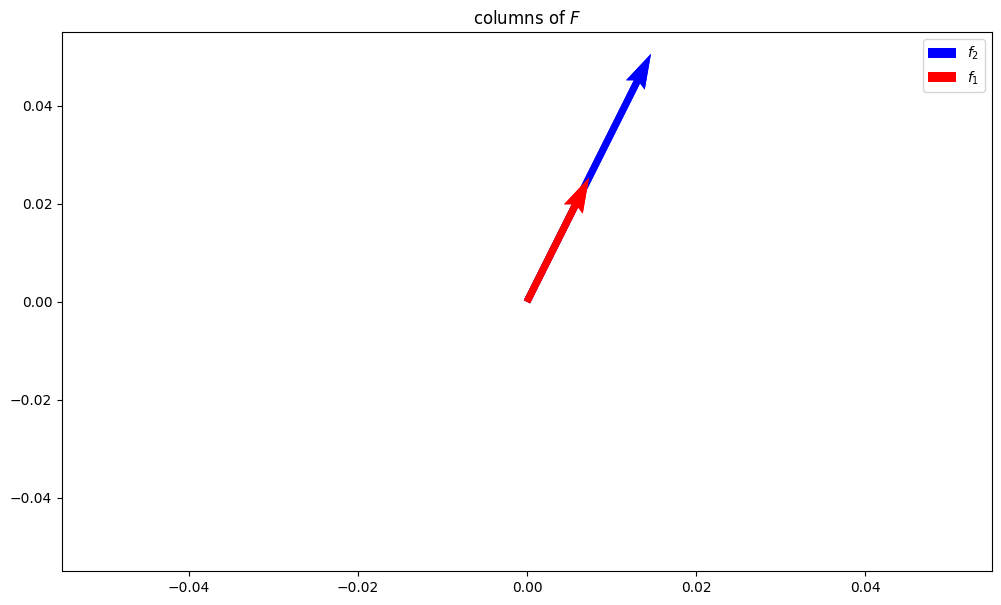

In [11]:
# creamos una imagen de tamaño 12x7
fig, ax = plt.subplots(figsize = (12, 7))

# quiver es básicamente un tipo de diagrama 2D que muestra líneas vectoriales como flechas.
# Este tipo de gráficos son útiles en ingenieros eléctricos para visualizar el potencial eléctrico y mostrar gradientes de tensión en ingeniería mecánica.
# F[0,1] = 4
# F[1,1] = 8
ax.quiver([0, 0], [0, 0], F[0,1], F[1,1], scale = 30, label = "$f_{2}$", color = 'blue')

# quiver es básicamente un tipo de diagrama 2D que muestra líneas vectoriales como flechas.
# Este tipo de gráficos son útiles en ingenieros eléctricos para visualizar el potencial eléctrico y mostrar gradientes de tensión en ingeniería mecánica.
# F[0,0] = 2
# F[1,0] = 4
ax.quiver([0, 0], [0, 0], F[0,0], F[1,0], scale =30, label = "$f_{1}$", color = 'red')

# describimos el titulo de la imagen
plt.title("columns of $F$")

# mostramos la leyenda de la imagen
plt.legend()

# mostramos la imagen en pantalla
plt.show()

A common occurance is a matrix with more columns than rows, but in data, more rows than columns is more common.

$ \ $

$(4)$ Consider the matrix $A$.


In [12]:
# creamos un array de tamaño 3x2
A = np.array([[1, 2],
              [1, -2],
              [-1, 1]])

# mostramos el array en forma de matriz
Matrix(A)

⎡1   2 ⎤
⎢      ⎥
⎢1   -2⎥
⎢      ⎥
⎣-1  1 ⎦

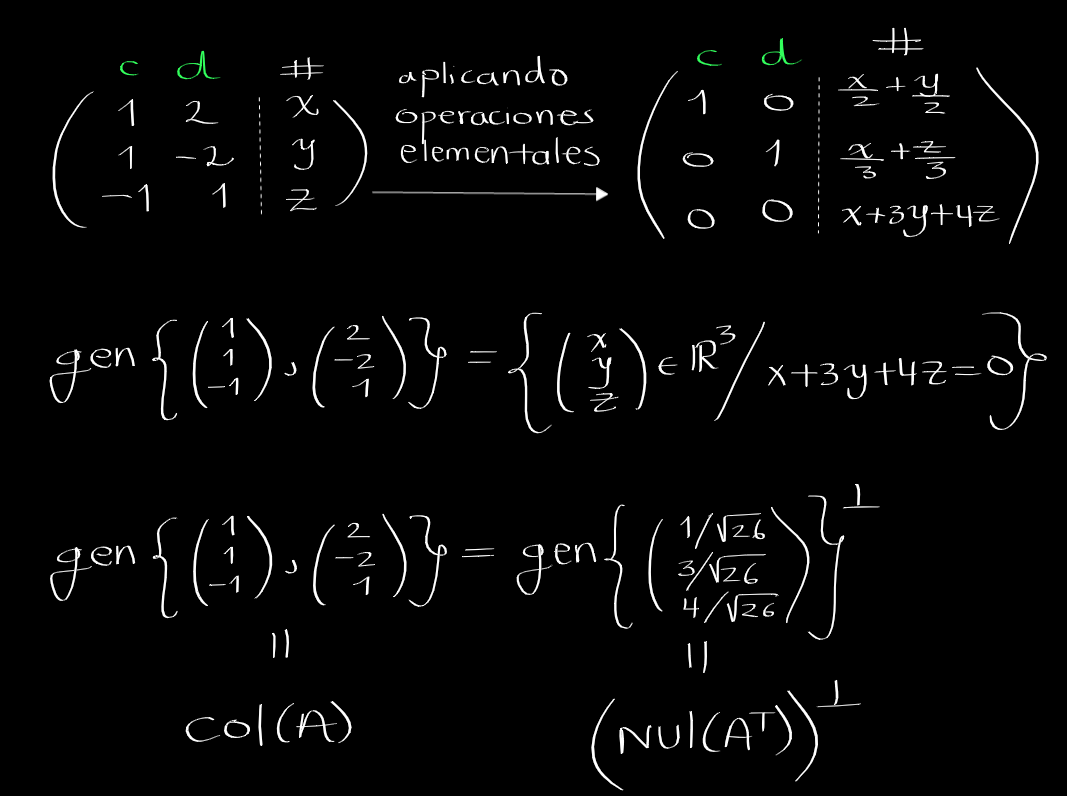

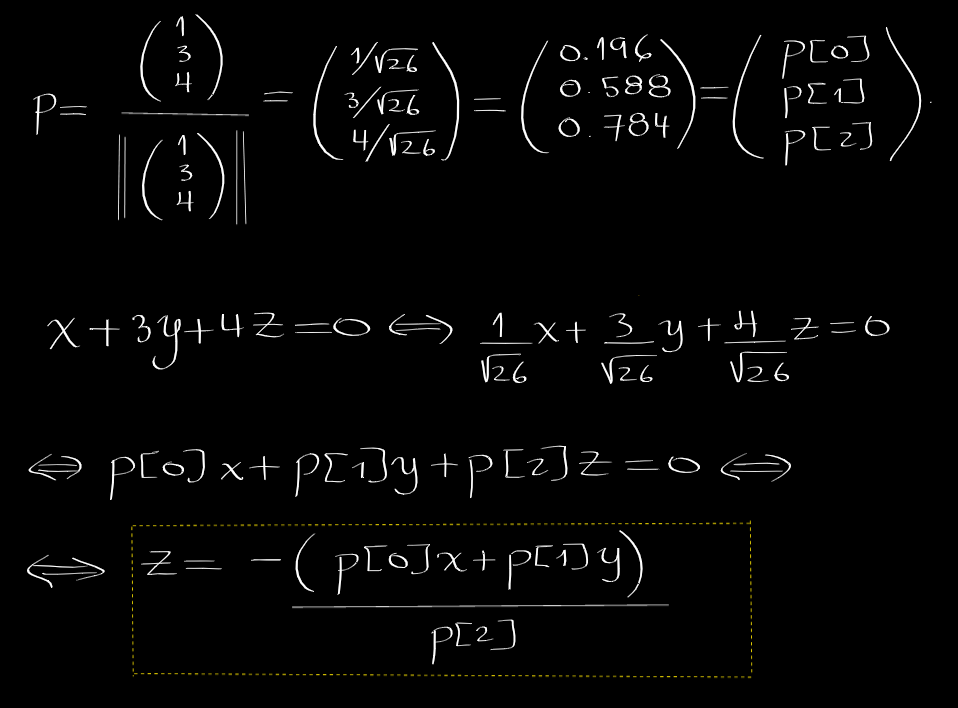

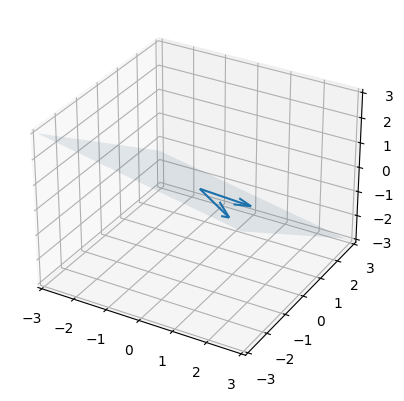

In [13]:
# creamos una imagen en R^3
ax = plt.figure().add_subplot(projection = '3d')

# tomamos una base para Null(F^T) -------> esta base consiste de un solo vector
p = null_space(A.T)

# describimos una margen de puntos para el eje X y el eje Y
X,Y = np.meshgrid(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1))

# debido al analisis hecho en la imagen anterior, entonces al despejar Z tenemos el siguiente resultado
Z = -(p[0]*X + p[1]*Y)/p[2]

# tomamos la superficie descrita por (X, Y, f(X,Y))
ax.plot_surface(X, Y, Z, alpha = 0.1)

# describimos las dos vectores columna de A
# Renglon_0 = A[0, : ] = [1, 2]
# Renglon_1 = A[1, : ] = [1, -2]
# Renglon_2 = A[2, : ] = [-1, 1]
ax.quiver([0, 0], [0, 0], [0, 0], A[0, : ], A[1, : ], A[2, : ])

# describimos los limites del eje x
ax.set_xlim([-3, 3])

# describimos los limites del eje y
ax.set_ylim([-3, 3])

# describimos los limites del eje z
ax.set_zlim([-3, 3])

# mostramos la imagen creada en pantalla
plt.show()

In [14]:
matrix_rank(A)

2

$ \ $

----

## ***Frobenius Norm of a Matrix***

$ \ $

The Frobenius norm, sometimes also called the Euclidean norm, is the matrix norm of an $m \times n$, i.e. given a Matrix $A$, then the norm of $A$ is defined as the square root of the sum of the absolute squares of its elements:

$$||A||_{F} = \sqrt{\sum\limits_{i=1}^{m} \sum\limits_{j=1}^{n} a^{2}_{ij} }$$

$(1)$ Let's use the matrix $A$ again as an example.

In [15]:
Matrix(A)

⎡1   2 ⎤
⎢      ⎥
⎢1   -2⎥
⎢      ⎥
⎣-1  1 ⎦

In [16]:
norm(A)

3.4641016151377544

$ \ $

$(2)$ You could also calculate the matrix norm manually, using the formula provided above, and confirm that the results are the same.

In [17]:
# describimos el numero de renglones y el numero de columnas del array A
m, n = A.shape[0], A.shape[1]

# establecemos la variable suma igual a cero, con la idea de actualizar esta variable y obtener la sumatoria de los cuadrados de los coeficientes de A
suma = 0

# realizamos una iteracion sobre [0,1,2,...,m-1]
for i in range(m):

    # realizamos una iteracion sobre [0,1,2,...,n-1]
    for j in range(n):

        # vamos sumando los cuadrados de los coeficientes de A
        suma += A[i,j] ** 2

# obtenemos la raiz cuadrada de la suma de los cuadrados de los coeficientes de A
np.sqrt(suma)

3.4641016151377544

$ \ $

-----

## ***Matrix Addition***


$ \ $

$\color{lightblue}{\text{Definition (matrix sum).}}$ Suppose that $A$ and $B$ are matrices of the same shape as is shown below.

$ \ $

$$A = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix}, \  B =\begin{bmatrix}
b_{11} & b_{12} & \cdots & b_{1n} \\
b_{21} & b_{22} & \cdots & b_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
b_{m1} & b_{m2} & \cdots & b_{mn}
\end{bmatrix}$$

$ \ $

then we define the matriz sum $A$ and $B$ as:

$ \ $

$$A+B = \begin{bmatrix}
a_{11}+b_{11} & a_{12}+b_{12} &  \cdots & a_{1n}+b_{1n} \\
a_{21}+b_{21} & a_{22}+b_{22} & \cdots & a_{2n}+b_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1}+b_{m1} & a_{m2}+b_{m2} & \cdots & a_{mn}+b_{mn}
\end{bmatrix}$$




$ \ $

$(1)$ We consider the following example.

In [18]:
A = np.array([[2, 3],
              [2, 7]])

B = np.array([[1, 1],
              [2, -1]])

C = A+B


Matrix(C)

⎡3  4⎤
⎢    ⎥
⎣4  6⎦

$ \ $

$(2)$ The  matrix $C$ is symmetric. This means that $C = C^{T}$.


In [19]:
C_T = C.T

Matrix(C_T)

⎡3  4⎤
⎢    ⎥
⎣4  6⎦

$ \ $

$(3)$ Diagonal matrix is a matrix in which the entries outside of the main diagonal are all zero.

In [20]:
D = np.diag(np.array([1,2,3]))

Matrix(D)

⎡1  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  3⎦

$ \ $

$(4)$ If the main diagonal is one, it's called a identity matrix in numpy.

In [21]:
I_3 = np.eye(3)

Matrix(I_3)

⎡1.0   0    0 ⎤
⎢             ⎥
⎢ 0   1.0   0 ⎥
⎢             ⎥
⎣ 0    0   1.0⎦

$ \ $

-----

## ***Matrix Multiplication***


$ \ $

$\color{lightblue}{\text{Definition (matrix multiplication).}}$ Suppose that $A = [a_{ij}]$ is a matrix with shape $m /times n$ and $B = [b_{jk}]$ is a matrix with shape $n \times p$, the we define the matrix multiplication between $A = [a_{ij}]$ and $B= [b_{jk}]$ as the following matrix:

$ \ $

$$A \cdot B = [a_{ij}] \cdot [b_{jk}] =  \begin{bmatrix}
\color{orange}{a_{11}} & \color{orange}{a_{12}} & \cdots & \color{orange}{a_{1n}} \\
\color{lightgreen}{a_{21}} & \color{lightgreen}{a_{22}} & \cdots & \color{lightgreen}{a_{2n}} \\
\vdots & \vdots & \ddots & \vdots \\
\color{red}{a_{m1}} & \color{red}{a_{m2}} & \cdots & \color{red}{a_{mn}}
\end{bmatrix} \cdot \begin{bmatrix}
\color{orange}{b_{11}} & \color{lightgreen}{b_{12}} & \cdots & \color{red}{b_{1p}} \\
\color{orange}{b_{21}} & \color{lightgreen}{b_{22}} & \cdots & \color{red}{b_{2p}} \\
\vdots & \vdots & \ddots & \vdots \\
\color{orange}{b_{n1}} & \color{lightgreen}{b_{n2}} & \cdots & \color{red}{b_{np}}
\end{bmatrix} = \begin{bmatrix}
c_{11} & c_{12} & \cdots & c_{1p} \\
c_{21} & c_{22} & \cdots & c_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
c_{m1} & c_{m2} & \cdots & c_{mp}
\end{bmatrix}$$

$ \ $

with $c_{ik}= \begin{bmatrix}
a_{i1} & a_{i2} & \cdots & a_{in}
\end{bmatrix} \cdot \begin{bmatrix}
b_{1k}\\
b_{2k}\\
\vdots\\
b_{nk}
\end{bmatrix} = \sum \limits_{j=1}^{n} a_{ij} \ b_{jk}$ for all $i\in \{1,\dots,m\}$ and $k\in \{1,\dots,p\}$.




$ \ $

$\color{lightblue}{\text{Definition (dot product).}}$ Suppose that $X, Y \in \mathbb{R}^{n}$, then we define the dot product between $X$ and $Y$ as:

$ \ $

$$X \bullet Y = \begin{bmatrix}
x_{1}\\
x_{2}\\
\vdots\\
x_{n}
\end{bmatrix} \bullet \begin{bmatrix}
y_{1}\\
y_{2}\\
\vdots\\
y_{n}
\end{bmatrix} := X^{T}\cdot Y = \begin{bmatrix}
x_{1} & x_{2} & \cdots & x_{n}
\end{bmatrix} \cdot \begin{bmatrix}
y_{1}\\
y_{2}\\
\vdots\\
y_{n}
\end{bmatrix}= \sum\limits_{i=1}^{n}x_{i}y_{i}.$$



$ \ $

$(1)$ Find the dot product between $a$ and $b$.

In [22]:
a = np.array([1,1])
b = np.array([1,2])

a @ b

3

In [23]:
a = np.array([1,1])
b = np.array([1,2])

np.dot(a,b)

3

$ \ $

$(2)$ Find the matrix multiplication between $A$ and $B$.

In [24]:
A = np.array([[2, 3],
              [2, 7]])

B = np.array([[1, 1],
              [2, -1]])

C = A @ B


Matrix(C)

⎡8   -1⎤
⎢      ⎥
⎣16  -5⎦

In [25]:
A = np.array([[2, 3],
              [2, 7]])

B = np.array([[1, 1],
              [2, -1]])

C = np.dot(A , B)


Matrix(C)

⎡8   -1⎤
⎢      ⎥
⎣16  -5⎦

$ \ $

$(3)$ If the matrix is full rank, we can invert it and get $A^{-1}$.

In [26]:
A_inv = inv(A)

Matrix(A_inv)

⎡0.875  -0.375⎤
⎢             ⎥
⎣-0.25   0.25 ⎦

In [27]:
# Matrix(np.dot(A, A_inv))
Matrix(A @ A_inv)

⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   1.0⎦

In [28]:
# Matrix(np.dot(A_inv, A))
Matrix(A_inv @ A)

⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   1.0⎦

$ \ $

$(4)$ Another type of matrixes is the orthogonal matrix. An orthogonal matrix is extremely useful. A matrix $Q$ is orthogonal if $Q^T=Q^{-1}$.

In [29]:
r = 2**(-1/2)

Q = r * np.array([[1,  1],
                  [1, -1]])
Matrix(Q)

⎡0.707106781186548  0.707106781186548 ⎤
⎢                                     ⎥
⎣0.707106781186548  -0.707106781186548⎦

In [30]:
# Matrix(np.dot(Q.T, Q))
Matrix(Q.T @ Q)

⎡        1.0           4.26642158858964e-17⎤
⎢                                          ⎥
⎣4.26642158858964e-17          1.0         ⎦

In [31]:
# Matrix(np.dot(Q, Q.T))
Matrix(Q @ Q.T)

⎡        1.0           4.26642158858964e-17⎤
⎢                                          ⎥
⎣4.26642158858964e-17          1.0         ⎦

$ \ $

$(5)$ $Q$ is orthogonal if and only if  the columns are orthonormal.

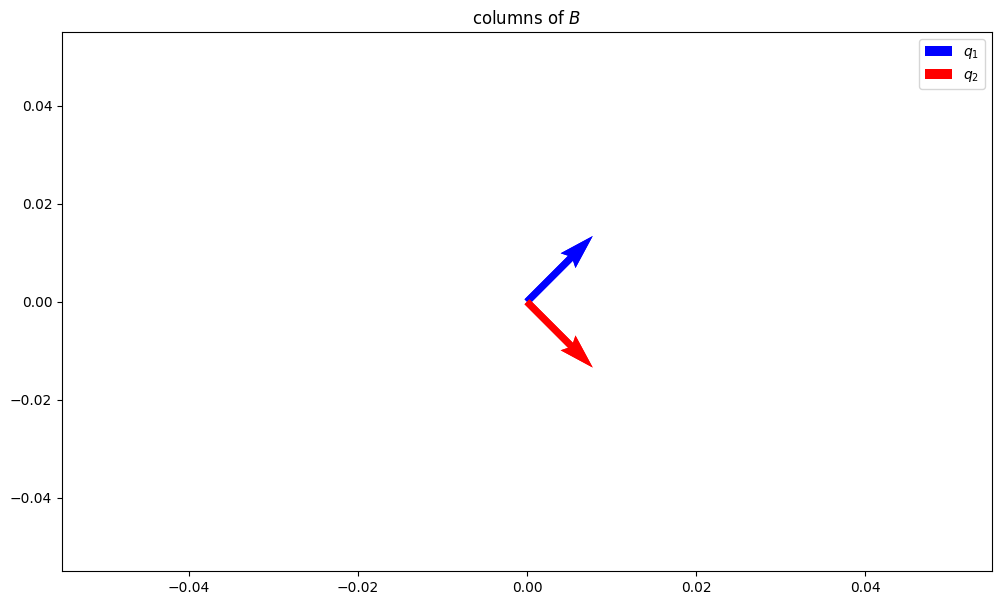

In [32]:
# creamos una imagen de tamaño 12x7
fig, ax = plt.subplots(figsize = (12, 7))

# Describimos geometricamente la columna 0 de  Q
ax.quiver([0, 0], [0, 0], Q[0,0], Q[1,0], scale = 10, label = "$q_{1}$", color = 'blue')

# Describimos geometricamente la columna 1 de  Q
ax.quiver([0, 0], [0, 0], Q[0,1], Q[1,1], scale = 10, label = "$q_{2}$", color = 'red')

# describimos el titulo de la imagen
plt.title("columns of $B$ ")

# describimos la leyenda de la imagen
plt.legend()

# mostramos la imagen en pantalla
plt.show()

$ \ $

$(6)$ We usually place our data in a design matrix $X$, which is a matrix where each row represents an individual sample. Consider the following example $X$.

In [33]:
# Creamos un matriz de tamaño 200x2 de tal manera que sus coeficientes se encuentran entre 0 y 4
A = 4* np.random.randn(200, 2)

# creamos la matriz B de tamaño 2x2
B = np.array([[1,    1],
              [0.1, -0.1]])

# multiplicamos las matrices A y B
X = np.dot(A, B)+10

# mostramos los primeros 5 renglones de nuestro array
X[0 : 5]

array([[ 8.77839637,  9.69520446],
       [ 9.66541402,  8.83570307],
       [13.84800372, 13.97668729],
       [ 9.1995608 ,  8.54744495],
       [ 5.61718537,  5.35764753]])

$ \ $

$(7)$ We can plot the samples.

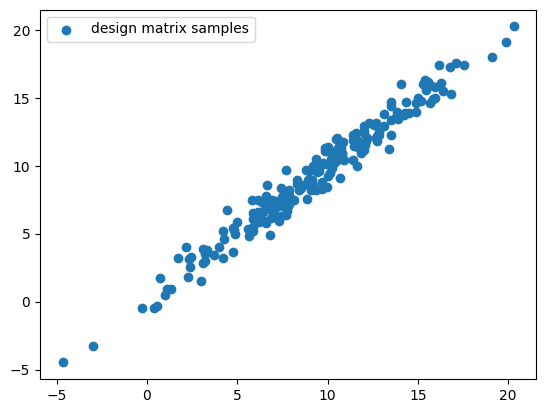

In [34]:
dic = {"design matrix samples" : X}
plot_2d(dic)

$ \ $

$(8)$ We can find the shape of the design matrix.

In [35]:
m, n = X.shape
print(f"number of smaples {m}, dimensions is {n}")

number of smaples 200, dimensions is 2


$ \ $

$(9)$ We can also perform lots of operations with Matrix multiplication, for example we can calculate the mean with the following.

In [36]:
# describimos una matriz de tamaño 1 x m, teniendio en cuenta que cada una de las entradas es 1/m
Y = (1/m) * np.ones((1, m))

# obtenemos los promedios de las columnas de X ------> una matriz de tamaño 1x2
mean = Y @ X
mean

array([[9.29022514, 9.3053052 ]])

In [37]:
X.mean(axis = 0)

array([9.29022514, 9.3053052 ])

$ \ $

$(10)$ Perform matrix multiplication using $\color{lightblue}{\text{no_mean}}$ and $X$, save the result in $X$. Show the mean of $X$ with respect to the rows is approximately zero.

In [38]:
# creamos la matriz identidad de tamaño mxm
I = np.identity(m)

# creamos una matriz de tamaño mxm  donde todos los coeficientes son iguales a 1/m
mat = (1/m) * np.ones((m, m))

# tomamos esta nueva matriz
no_mean = I-mat

# mostramos la matriz obtenida en pantalla
no_mean

array([[ 0.995, -0.005, -0.005, ..., -0.005, -0.005, -0.005],
       [-0.005,  0.995, -0.005, ..., -0.005, -0.005, -0.005],
       [-0.005, -0.005,  0.995, ..., -0.005, -0.005, -0.005],
       ...,
       [-0.005, -0.005, -0.005, ...,  0.995, -0.005, -0.005],
       [-0.005, -0.005, -0.005, ..., -0.005,  0.995, -0.005],
       [-0.005, -0.005, -0.005, ..., -0.005, -0.005,  0.995]])

In [39]:
X_1 = no_mean @ X

print("mean of X_1", X_1.mean(axis = 0))

mean of X_1 [-2.08721929e-16 -8.97060204e-16]


[[9.29022514 9.3053052 ]]


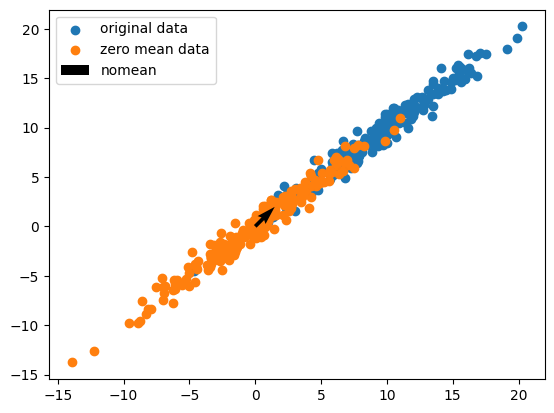

In [40]:
dict_={"original data" : X, "zero mean data" : X_1, "nomean" : mean}
plot_2d(dict_)

$ \ $

----

## ***Eigen Decomposition (Eigenvectors and Eigenvalues)***

$ \ $

Let $A$ be a square $n\times n$ matrix with $n$ linearly independent eigenvectors $q_i$ where $i \in \{1, ..., n\}$. Then $A$ can be factorized as


$$A=Q D Q^{-1}$$


where $Q$ is the square $n\times n$ matrix whose $i^{th}$ column is the eigenvector $q_i$ of $A$, and $D$  is the diagonal matrix whose diagonal elements are the corresponding eigenvalues, $D_{ii} = λ_{j}$.

$ \ $

$(1)$ We can obtain the Matrices as follows.




In [41]:
A = np.array([[2, 3],
              [2, 7]])

eigen_values , eigen_vectors = eig(A)

$ \ $

$(2)$ `eigen_values` is a vector so we convert it to a diagonal matrix  using the $np.diag$ function.

In [42]:
D = Matrix(np.diag(eigen_values))
D

⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   8.0⎦

$ \ $

$(3)$ We can retrieve the original matrix as follows.

In [43]:
Q = eigen_vectors
Q_inv = inv(eigen_vectors)

In [44]:
A = Q @ D @ Q_inv
Matrix(A)

⎡2.0  3.0⎤
⎢        ⎥
⎣2.0  7.0⎦

In [45]:
A = np.dot(np.dot(Q, D), Q_inv)
Matrix(A)

⎡2.0  3.0⎤
⎢        ⎥
⎣2.0  7.0⎦

$ \ $

----

## ***Factorization for $PCA$ (Principal component analysis)***

$ \ $

$(1)$ Let's define the matrix $C$ as:

$$C=\dfrac{1}{m}X_{1}^{T}X_{1}$$



In [46]:
C = (1/m) * (X_1.T @ X_1)
Matrix(C)

⎡18.6807625782668  18.2939269237504⎤
⎢                                  ⎥
⎣18.2939269237504  18.555348391218 ⎦

This matrix is simmetric, and this implies that there exist matrices $Q$ non singular and $D$ diagonal such that $C=Q D Q^{-1}$.

$ \ $

$(2)$ Now, we calculate the proper values and proper vectors.

In [47]:
# Se calculan los valores propios (eigen_values) y los vectores propios (eigen_vectors) de la matriz simétrica C. Los valores propios representan las magnitudes de influencia de cada vector propio en la transformación lineal.
eigen_values , eigen_vectors = eig(C)

$ \ $

$(3)$ We can perform $PCA$ using factorization. To find the first principle component, we need to find the eigenvector with the largest eigenvalue.

In [48]:
# La función np.argmax() devuelve el índice del valor propio máximo en el arreglo eigen_values
indice = np.argmax(eigen_values)

# Se selecciona el vector propio asociado al valor propio más grande. A continuación, se remodela el vector propio seleccionado a una columna utilizando reshape(-1, 1).
v = eigen_vectors[:, indice].reshape(-1,1)

# mostramos el vector en pantalla
v

array([[0.70831763],
       [0.70589385]])

$ \ $

$(4)$ We can calculate first principal component by finding the projection of the original data onto $v$.

In [49]:
Z = X_1 @ v

$ \ $

$(5)$  Let's do the following things:

* Perform $PCA$ with `n_components = 1` on $X_1$.

* Store the transformed data in **X_transformed**.

* Also do an inverse_transform using the same fitted $PCA$ object, store the result in $X$.

In [50]:
# creamos un modelo PCA con los parametros establecidos
pca = PCA(n_components = 1)

# obtenemos un conjunto de datos transformados por el modelo
X_transformed = pca.fit_transform(X)

# obtenemos la inversa de los datos transformados
X = pca.inverse_transform(X_transformed)

$ \ $

$(6)$ Find the transform data back to its original space from the equation $\hat{X}=\mathbf{Z} \mathbf{v}^T$ and call it ***X_hat***.

In [51]:
X_hat = Z @ v.T

$ \ $

$(7)$ You can also check that the two methods give the same "inverse transform" result ($X$ and ***X_hat*** will overlap in the plot) by running the following cell.

[[0.70831763 0.70589385]]


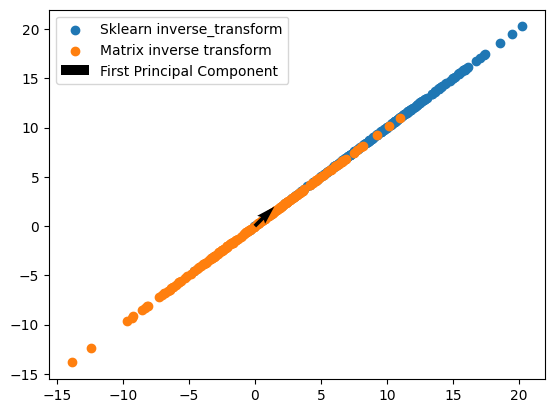

In [53]:
dic = {"Sklearn inverse_transform": X, "Matrix inverse transform": X_hat, "First Principal Component": v.T}
plot_2d(dic)